Downloading the dataset

In [8]:
!kaggle datasets download -d mohammadomarshahab/skin-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/mohammadomarshahab/skin-classification-dataset
License(s): unknown
 84% 53.0M/63.4M [00:00<00:00, 198MB/s]
100% 63.4M/63.4M [00:00<00:00, 191MB/s]


In [15]:
from zipfile import ZipFile

with ZipFile("skin-classification-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [19]:
import os
train_dir  ="/content/skin-disease-datasaet/train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  985


In [20]:
test_dir = "/content/skin-disease-datasaet/test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  294


Seeing some sample images

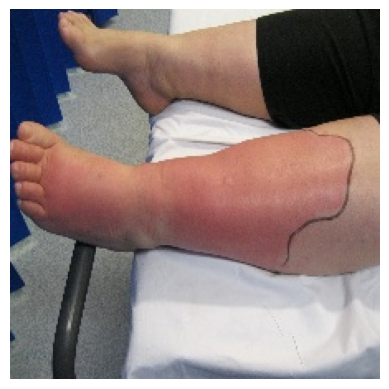

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "/content/skin-disease-datasaet/train_set/BA- cellulitis/BA- cellulitis (1).jpeg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [22]:
print(img.shape)

(224, 224, 3)


Using Data Generators  - Helping in Data Augmentation

In [42]:
#DEFINING THE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale = 1./255,
)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
#Defining the training set data generator

train_dir  ="/content/skin-disease-datasaet/train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 1022 images belonging to 9 classes.


In [44]:
#Defining the test set generator

test_dir = "/content/skin-disease-datasaet/test_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 331 images belonging to 9 classes.


Building the CNN

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
from tensorflow.keras import regularizers

# Define your model as before
model = Sequential()
# Add layers
model.add(Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
# Continue adding more layers...

In [54]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.7))
model.add(Dense(9, activation="softmax"))

In [55]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 9, 9, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 9, 9, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,312,393 (16.45 MB)

 Trainable params: 4,309,641 (16.44 MB)

 Non-trainable params: 2,752 (10.75 KB)

Model Compiling

In [56]:
print(train_generator.num_classes)

9


In [59]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

Model Training

In [64]:
history  = model.fit(train_generator, epochs = 60, batch_size = 8, validation_data = test_generator)

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9216 - loss: 0.2391 - val_accuracy: 0.8006 - val_loss: 1.1295
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9133 - loss: 0.2711 - val_accuracy: 0.8006 - val_loss: 0.6967
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9363 - loss: 0.1893 - val_accuracy: 0.8731 - val_loss: 0.5325
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9502 - loss: 0.2513 - val_accuracy: 0.8640 - val_loss: 0.8233
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9534 - loss: 0.1473 - val_accuracy: 0.8640 - val_loss: 0.7190
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9236 - loss: 0.2383 - val_accuracy: 0.8218 - val_loss: 1.1017
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9213 - loss: 0.2868 - val_accuracy: 0.6103 - val_loss: 1.8684
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8717 - loss: 0.4511 - val_accuracy: 0.6224

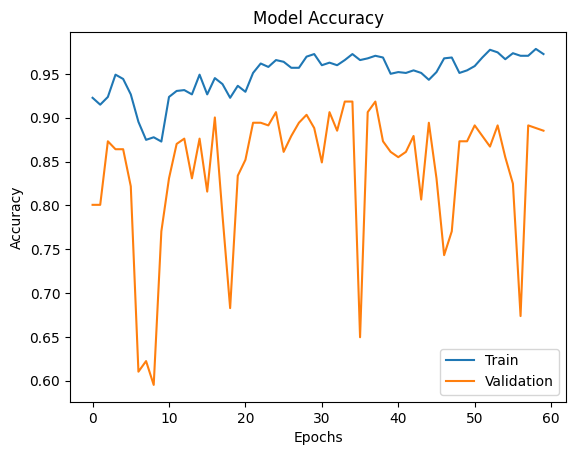

In [65]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [66]:
model.save("skin_disease_model.keras")